MNIST DATASET PREDICTION USING AUTOENCODER (A RNN MODEL)

The MNIST dataset is a large collection of handwritten digits, consisting of 70,000 images of size 28x28 pixels. 

The dataset is divided into a training set of 60,000 examples and a test set of 10,000 examples. 

Each image is a grayscale representation of a handwritten digit, with pixel values ranging from 0 (black) to 1 (white).

Key Features

**Training Set**: 60,000 images of handwritten digits (0-9)

**Test Set**: 10,000 images of handwritten digits (0-9)

**Image Size**: 28x28 pixels

**Pixel Values**: Grayscale, ranging from 0 (black) to 1 (white)

**Target Data**: One-hot binary vectors of size 10, corresponding to the digit

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Reshape, LeakyReLU, BatchNormalization, GRU, Input
from tensorflow.keras.optimizers import Adam

(x_train, _), (x_test, _) = mnist.load_data()
x_train = (x_train.astype(np.float32) - 127.5) / 127.5 
x_train = np.expand_dims(x_train, axis=-1) 

x_test = (x_test.astype(np.float32) - 127.5) / 127.5 
x_test = np.expand_dims(x_test, axis=-1) 


BUILDING ENCODER

In [3]:
def build_encoder(input_shape):
    inputs = Input(shape=input_shape)
    x = Flatten()(inputs)
    x = Dense(128, activation='relu')(x)
    x = Reshape((128, 1))(x)
    encoded = GRU(64, return_sequences=False)(x)
    return Model(inputs, encoded, name='encoder')


BUILDING DECODER

In [4]:
def build_decoder(latent_dim):
    latent_inputs = Input(shape=(latent_dim,))
    x = Dense(128, activation='relu')(latent_inputs)
    x = Reshape((128, 1))(x)
    x = GRU(128, return_sequences=True)(x)
    x = GRU(128, return_sequences=False)(x)
    x = Dense(28 * 28, activation='tanh')(x)
    decoded = Reshape((28, 28, 1))(x)
    return Model(latent_inputs, decoded, name='decoder')


COMPILING THE MODEL

In [5]:
input_shape = (28, 28, 1)
latent_dim = 64

encoder = build_encoder(input_shape)
decoder = build_decoder(latent_dim)

inputs = Input(shape=input_shape)
encoded = encoder(inputs)
decoded = decoder(encoded)

autoencoder = Model(inputs, decoded, name='autoencoder')
autoencoder.compile(optimizer='adam', loss='mse')


TRAINING MODEL WITH 5 EPOCHS

In [9]:
autoencoder.fit(x_train, x_train, epochs=5, batch_size=64, validation_data=(x_test, x_test))


Epoch 1/5
938/938 [==============================] - 500s 533ms/step - loss: 0.2394 - val_loss: 0.1831
Epoch 2/5
938/938 [==============================] - 556s 593ms/step - loss: 0.1508 - val_loss: 0.1320
Epoch 3/5
938/938 [==============================] - 579s 617ms/step - loss: 0.1236 - val_loss: 0.1137
Epoch 4/5
938/938 [==============================] - 606s 646ms/step - loss: 0.1096 - val_loss: 0.1036
Epoch 5/5
938/938 [==============================] - 600s 640ms/step - loss: 0.0992 - val_loss: 0.0934


VISUALIZATION OF REAL AND PREDICTED DATA

1/1 [==============================] - 1s 771ms/step


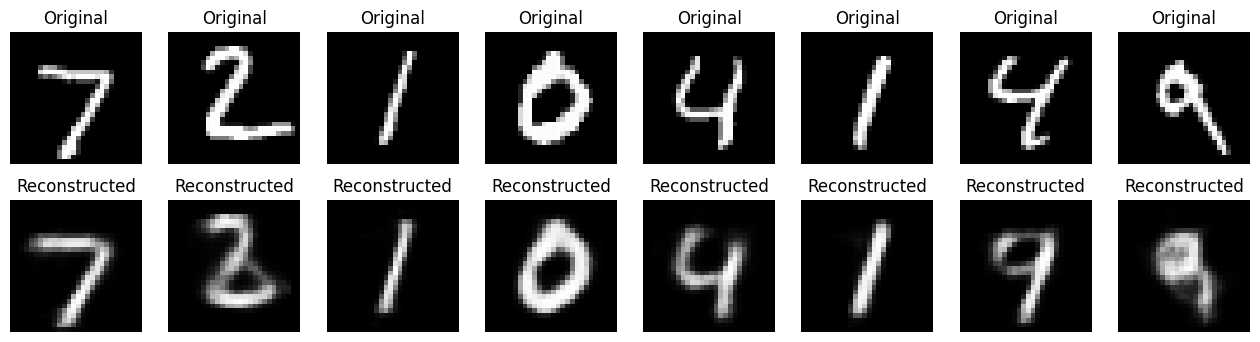

In [10]:
def visualize_real_vs_reconstructed_data(x_test, autoencoder, num_images=8):
    decoded_imgs = autoencoder.predict(x_test[:num_images])
    real_imgs = 0.5 * x_test[:num_images] + 0.5  
    decoded_imgs = 0.5 * decoded_imgs + 0.5

    fig, axs = plt.subplots(2, num_images, figsize=(2 * num_images, 4))
    for i in range(num_images):
        axs[0, i].imshow(real_imgs[i, :, :, 0], cmap='gray')
        axs[0, i].axis('off')
        axs[0, i].set_title("Original")
        axs[1, i].imshow(decoded_imgs[i, :, :, 0], cmap='gray')
        axs[1, i].axis('off')
        axs[1, i].set_title("Reconstructed")
    plt.show()

visualize_real_vs_reconstructed_data(x_test, autoencoder, num_images=8)


In [6]:
from sklearn.metrics import mean_squared_error
reconstructed_imgs = autoencoder.predict(x_test)
mse = np.mean(np.square(x_test - reconstructed_imgs))

print(f'Mean Squared Error (MSE) on Test Data: {mse:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step
Mean Squared Error (MSE) on Test Data: 0.9258


If the goal is to reconstruct existing data accurately, the autoencoder with an MSE of 0.9625 would be more optimal because it directly minimizes the reconstruction error.